# Inspect the effect of $dI/dt$ on population firing rate

Shown in fig. 7.

In [1]:
from common import colors, savefig

In [2]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/home/eharkin/projects/5HTGIF-stable/src


In [3]:
import warnings
import re
import copy
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import numpy as np
from tqdm.notebook import trange

from ezephys import pltools

from grr.Simulation import GIFnet_Simulation
from grr.Spiketrain import PSTH

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'publication_figure_style.dms'))
IMG_PATH = None#os.path.join('figs', 'ims', 'writeup', 'GIF_network')
BASELINE_LEVELS = np.array([-0.080, -0.060, -0.040, -0.020, 0, 0.020, 0.040, 0.060, 0.080])

In [ ]:
DATA_PATH = os.path.join('data', 'simulations', 'GIF_network')

sim_dict = {'Baseline level': [], 'Rep': [], 'Model': [], 'IA': [], 'Adaptation': [], 'DV': []}

for condition in os.listdir(DATA_PATH):
    if not condition.startswith('deriv_input'):
        continue
        
    for baseline_level in ['-0.080', '-0.060', '-0.040', '-0.020', '0.000', '0.020', '0.040', '0.060', '0.080']:
        for fname in os.listdir(os.path.join(DATA_PATH, condition, '{}_baseline'.format(baseline_level))):
            if fname.endswith(('hdf5', 'h5')):

                try:
                    this_model = GIFnet_Simulation(
                        os.path.join(DATA_PATH, condition, '{}_baseline'.format(baseline_level), fname), 
                        mode = 'r'
                    ) 

                    sim_dict['Model'].append(this_model)
                    sim_dict['Baseline level'].append(float(baseline_level))
                    sim_dict['Rep'].append(
                        int(re.search(r'rep([0-9]+)', fname).groups()[-1])
                    )
                    
                    if 'ia_ko' in condition:
                        sim_dict['IA'].append('KO')
                    else:
                        sim_dict['IA'].append('CTRL')
                    if 'adaptation' in condition:
                        sim_dict['Adaptation'].append('swap_ser_only')
                    else:
                        sim_dict['Adaptation'].append('CTRL')
                    if 'dv' in condition:
                        sim_dict['DV'].append('swap_ser_only')
                    else:
                        sim_dict['DV'].append('CTRL')
                except IOError:
                    print('Problem with {} baseline {}'.format(baseline_level, fname))
                    continue
            

sim_df = pd.DataFrame(sim_dict).sort_values(['Rep'])
sim_df.reset_index(inplace=True, drop=True)
sim_df.head()

In [ ]:
sim_df['Principal PSTH'] = None
sim_df['Principal PSTH'] = sim_df['Principal PSTH'].astype(object)
sim_df['GABA PSTH'] = None
sim_df['GABA PSTH'] = sim_df['GABA PSTH'].astype(object)

In [ ]:
PSTH_width = 50.

for i in trange(sim_df.shape[0], desc='Model'):
    
    # Get PSTH from 5HT population.
    sim_df.at[i, 'Principal PSTH'] = np.empty((
        sim_df.loc[i, 'Model'].get_no_sweeps(), 
        sim_df.loc[i, 'Model'].get_no_timesteps()
    ))
    for sweep_no in trange(sim_df.loc[i, 'Model'].get_no_sweeps(), desc='5HT sweep', leave=False):
        sim_df.loc[i, 'Principal PSTH'][sweep_no, :] = PSTH(
            sim_df.loc[i, 'Model'].ser_spktrains[sweep_no, ...].sum(axis = 0),
            PSTH_width,
            sim_df.loc[i, 'Model'].get_no_ser_neurons()
        )
    
    # Get PSTHs from GABA population.
    sim_df.at[i, 'GABA PSTH'] = np.empty((
        sim_df.loc[i, 'Model'].get_no_sweeps(), 
        sim_df.loc[i, 'Model'].get_no_timesteps()
    ))
    for sweep_no in trange(sim_df.loc[i, 'Model'].get_no_sweeps(), desc='GABA sweep', leave=False):
        sim_df.loc[i, 'GABA PSTH'][sweep_no, :] = PSTH(
            sim_df.loc[i, 'Model'].gaba_spktrains[sweep_no, ...].sum(axis = 0),
            PSTH_width,
            sim_df.loc[i, 'Model'].get_no_gaba_neurons()
        )

print('\nDone!')

SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnTW9kZWwnLCBtYXg9OTAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2lkdGjigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR0FCQSBzd2VlcCcsIG1heD0yMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3figKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnNUhUIHN3ZWVwJywgbWF4PTIwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


In [ ]:
sim_df.head()

In [ ]:
psths = []
for i, row in sim_df.loc[sim_df['Baseline level'] == 0.040, ['Rep', 'Principal PSTH', 'GABA PSTH']].iterrows():
    psths.append(row['Principal PSTH'].T)
    
psths = np.array(psths)

plt.plot(psths.mean(axis=0))

In [ ]:
def get_psth_max_by_celltype(df):
    max_resp = {key: np.empty((20, len(BASELINE_LEVELS))) for key in ['ser', 'som']}
    max_resp_std = {key: np.empty((20, len(BASELINE_LEVELS))) for key in ['ser', 'som']}
    for i, baseline in enumerate(BASELINE_LEVELS):

        psths = {key: [] for key in max_resp.keys()}
        for _, row in df.loc[df['Baseline level'] == baseline, ['Rep', 'Principal PSTH', 'GABA PSTH']].iterrows():
            psths['ser'].append(row['Principal PSTH'])
            psths['som'].append(row['GABA PSTH'])

        for key in max_resp:
            max_resp[key][:, i] = np.asarray(psths[key])[:, :, 19000:].max(axis=2).mean(axis=0)
            max_resp_std[key][:, i] = np.asarray(psths[key])[:, :, 19000:].max(axis=2).std(axis=0)

    for key in max_resp:
        max_resp[key] = max_resp[key].T
        max_resp_std[key] = max_resp_std[key].T
        
    return {ct: {'mean': max_resp[ct], 'std': max_resp_std[ct]} for ct in ['ser', 'som']}

In [ ]:
max_resp = {
    'ctrl': get_psth_max_by_celltype(
        sim_df.query('(Adaptation == "CTRL") and (DV == "CTRL") and (IA == "CTRL")')
    ),
    'dv': get_psth_max_by_celltype(
        sim_df.query('(Adaptation == "CTRL") and (DV == "swap_ser_only") and (IA == "CTRL")')
    ),
    'adaptation': get_psth_max_by_celltype(
        sim_df.query('(Adaptation == "swap_ser_only") and (DV == "CTRL") and (IA == "CTRL")')
    ),
    'dv_adaptation': get_psth_max_by_celltype(
        sim_df.query('(Adaptation == "swap_ser_only") and (DV == "swap_ser_only") and (IA == "CTRL")')
    ),
    'ia': get_psth_max_by_celltype(
        sim_df.query('(Adaptation == "CTRL") and (DV == "CTRL") and (IA == "KO")')
    ),
}

## Cache results

Computing max of each PSTH takes a long time. Save `max_resp` in case the notebook needs to be re-run. When re-running, just run the cells with import/constants (1-4) and then start here.

In [5]:
cache_path = os.path.join('data', 'processed', 'simulations', 'max_deriv_response_all_conditions.dat')
if os.path.exists(cache_path):
    print('Loading.')
    with open(cache_path, 'rb') as f:
        max_resp = pickle.load(f)
        f.close()
else:
    print('Saving.')
    with open(cache_path, 'wb') as f:
        pickle.dump(max_resp, f)
        f.close()

Loading.


## Create figures

In [6]:
deriv_in_pA_s = 100 / (np.logspace(np.log10(100), np.log10(1e4), 20) * 1e-3)

In [8]:
def custom_cbar(x, colors, levels, width=1):
    assert len(colors) == len(levels) - 1
    for i, color in enumerate(colors):
        plt.fill_between(
            [x - width/2., x + width/2.], 
            [np.log10(levels[i])] * 2,
            [np.log10(levels[i+1])] * 2,
            color=color
        )
        
    plt.yticks(np.log10(levels), levels)

In [9]:
def deriv_colormesh(Z, ax=None, **pltargs):
    if ax is None:
        ax = plt.gca()
        
    x = np.concatenate([[1000], (deriv_in_pA_s[1:] + deriv_in_pA_s[:-1])/2., [9]])
    y = (1e3 * np.linspace(BASELINE_LEVELS.min() - 0.01, BASELINE_LEVELS.max() + 0.01, len(BASELINE_LEVELS) + 1))
    mappable = ax.pcolormesh(x, y[2:], Z[2:], **pltargs)
    ax.set_ylabel('Baseline (pA)')
    ax.set_xlabel('$dI/dt$ (pA/s)')
    
    return mappable

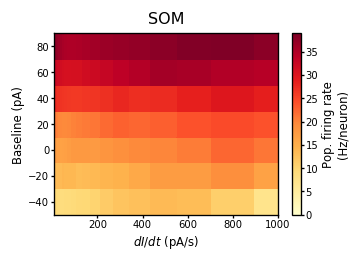

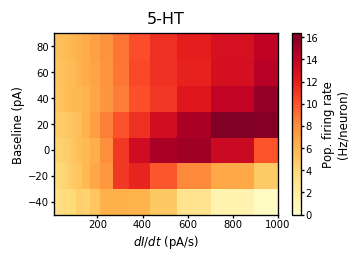

In [10]:
for ct, lab in {'ser': '5-HT', 'som': 'SOM'}.items():
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.set_title(lab)
    mappable = deriv_colormesh(
        max_resp['ctrl'][ct]['mean'], 
        ax, 
        cmap=plt.get_cmap('YlOrRd'),
        vmin=0
    )
    cbar = fig.colorbar(mappable)
    cbar.set_label('Pop. firing rate\n(Hz/neuron)')

    if IMG_PATH is not None:
        savefig(os.path.join(IMG_PATH, '{}_deriv'.format(ct)))
    plt.show()

In [11]:
def mark_outline(
    Z, threshold, edgecolor='k', fillcolor='red', ax=None, fill_params={}, edge_params={}
):
    """Contour the area of Z that's above threshold."""
    if ax is None:
        ax = plt.gca()
        
    ax.contourf(
        deriv_in_pA_s,
        1e3 * BASELINE_LEVELS,
        Z,
        colors=(fillcolor,),
        levels=(threshold, np.inf),
        **fill_params
    )
    if edgecolor is not None:
        ax.contour(
            deriv_in_pA_s,
            1e3 * BASELINE_LEVELS,
            Z,
            colors=(edgecolor,),
            levels=(threshold),
            **edge_params
        )
        
def mark_contours(Z, threshold, interval, ax=None, **pltargs):
    if ax is None:
        ax = plt.gca()
        
    levels = np.arange(threshold, Z.max(), interval)
    
    ax.contour(
        deriv_in_pA_s,
        1e3 * BASELINE_LEVELS,
        Z,
        levels=levels,
        **pltargs
    )
    

def round_up(value, factor, starting_from=0):
    """Round a value up to the nearest multiple of a given factor."""
    assert starting_from < value
    assert factor < (value - starting_from)
    return factor * (1 + ((value - starting_from) // factor)) + starting_from

def mark_contours_colorbar(values, ax=None, **pltargs):
    if ax is None:
        ax = plt.gca()
        
    for val in values:
        ax.axhline(val, **pltargs)

/home/eharkin/miniconda3/envs/testpozz/lib/python2.7/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


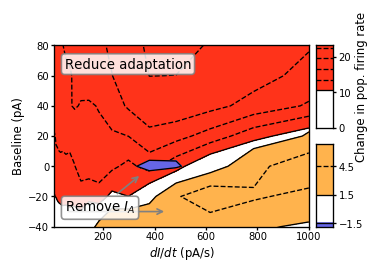

In [12]:
spec = gs.GridSpec(2, 2, width_ratios=(1, 0.07), wspace=0.05)

plt.subplot(spec[:, 0])
# Mark effect of adaptation
mark_outline(
    max_resp['adaptation']['ser']['mean'] - max_resp['ctrl']['ser']['mean'],
    10.5,
    fillcolor=(1, 0.2, 0.1)
)
mark_contours(
    max_resp['adaptation']['ser']['mean'] - max_resp['ctrl']['ser']['mean'],
    10.5 + 3,
    3,
    linestyles='--',
    colors='k'
)

# Mark effect of removing IA
# Negative part of IA KO first.
mark_outline(
    -(max_resp['ia']['ser']['mean'] - max_resp['ctrl']['ser']['mean']), 
    1.5,
    fillcolor=(0.4, 0.4, 0.9),
    fill_params={'zorder': 10},
    edge_params={'zorder': 11}
)
mark_contours(  # Doesn't do anything because effect is too small.
    -(max_resp['ia']['ser']['mean'] - max_resp['ctrl']['ser']['mean']),
    1.5 + 3,
    3,
    linestyles='--',
    colors='k',
    zorder=12
)

# Positive part of IA KO
mark_outline(
    max_resp['ia']['ser']['mean'] - max_resp['ctrl']['ser']['mean'], 
    1.5,
    fillcolor=(1, 0.7, 0.3)
)
mark_contours(
    max_resp['ia']['ser']['mean'] - max_resp['ctrl']['ser']['mean'],
    1.5 + 3,
    3,
    linestyles='--',
    colors='k'
)

# Annotations
annotation_box_style = dict(boxstyle="round, pad=0.25", fc="w", alpha=0.85)
plt.annotate('Reduce adaptation', (50, 65), bbox=annotation_box_style)
plt.annotate(
    '', (450, -30), (50, -30),
    arrowprops={'arrowstyle': '->'}
)
plt.annotate(
    'Remove $I_A$', (350, -5), (50, -30), bbox=annotation_box_style,
    arrowprops={'arrowstyle': '->'}
)

plt.ylim(-40, 80)
plt.ylabel('Baseline (pA)')
plt.xlabel('$dI/dt$ (pA/s)')

# Subplots for color bars.
plt.subplot(spec[0, 1])
max_val = (max_resp['adaptation']['ser']['mean'] - max_resp['ctrl']['ser']['mean']).max()
plt.fill_between(
    [0, 1], 
    [10.5] * 2, 
    [round_up(max_val, 3, 1.5)] * 2,
    color=(1, 0.2, 0.1)
)
mark_contours_colorbar([10.5], ls='-', color='k')
mark_contours_colorbar(np.arange(10.5 + 3, max_val, 3), ls='--', color='k')
plt.ylim(
    0, 
    max_val
)
plt.gca().yaxis.set_ticks_position('right')
plt.xticks([])
plt.ylabel('Change in pop. firing rate')
plt.gca().yaxis.set_label_position('right')

plt.subplot(spec[1, 1])
max_val = (max_resp['ia']['ser']['mean'] - max_resp['ctrl']['ser']['mean']).max()
min_val = (max_resp['ia']['ser']['mean'] - max_resp['ctrl']['ser']['mean']).min()

plt.fill_between(
    [0, 1],
    [1.5] * 2,
    [round_up(max_val, 3, 1.5)],
    color=(1, 0.7, 0.3)
)
mark_contours_colorbar([1.5], ls='-', color='k')
mark_contours_colorbar([4.5], ls='--', color='k')
plt.fill_between(
    [0, 1],
    [-1.5] * 2,
    [min_val] * 2,
    color=(0.4, 0.4, 0.9)
)
mark_contours_colorbar([-1.5], ls='-', color='k')
plt.gca().yaxis.set_ticks_position('right')
plt.ylim(min_val, max_val)
plt.yticks(np.arange(-1.5, max_val, 3))
plt.xticks([])

if IMG_PATH is not None:
    savefig(os.path.join(IMG_PATH, 'dv_multi_manipulation_contour'))

In [13]:
def get_normalizer(x):
    """Get a function that normalizes an array to the max of this function's argument."""
    max_value = np.max(x)
    def normalize(arr):
        return np.asarray(arr) / max_value
    return normalize

def plot_mean_std(mean, std, ax=None, normalize=True, fill_args={}, line_args={}, **pltargs):
    if ax is None:
        ax = plt.gca()
        
    # Set common options.
    fill_args.update(pltargs)
    line_args.update(pltargs)
    
    # Optionally normalize the data using a function 'norm'
    # If normalization is off, 'norm' is identity
    if normalize:
        norm = get_normalizer(mean)
    else:
        norm = lambda x: x
    
    ax.fill_between(
        deriv_in_pA_s,
        norm(mean - std),
        norm(mean + std),
        **fill_args
    )
    ax.plot(
        deriv_in_pA_s,
        norm(mean),
        **line_args
    )

def patch_axes():
    plt.legend()
    plt.ylim(min(0, plt.ylim()[0]))
    plt.xlabel('$dI/dt$ (pA/s)')
    plt.ylabel('Normalized peak firing rate')
    pltools.hide_border('tr', trim=True)

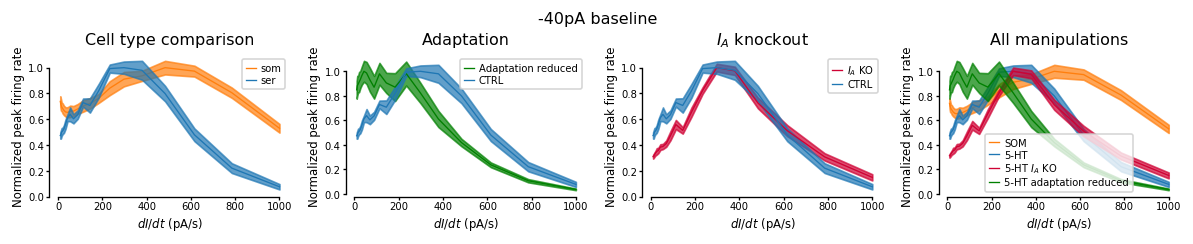

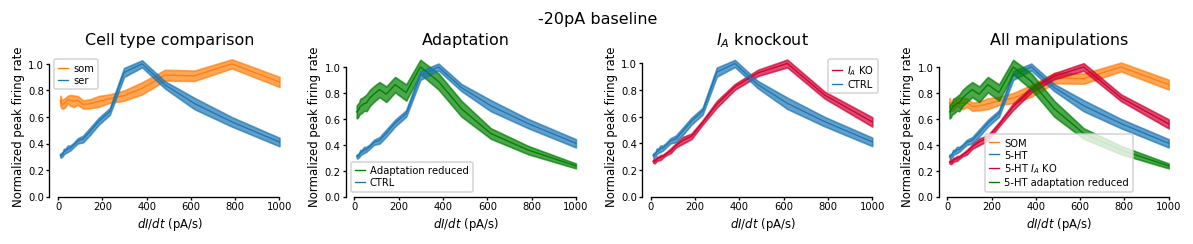

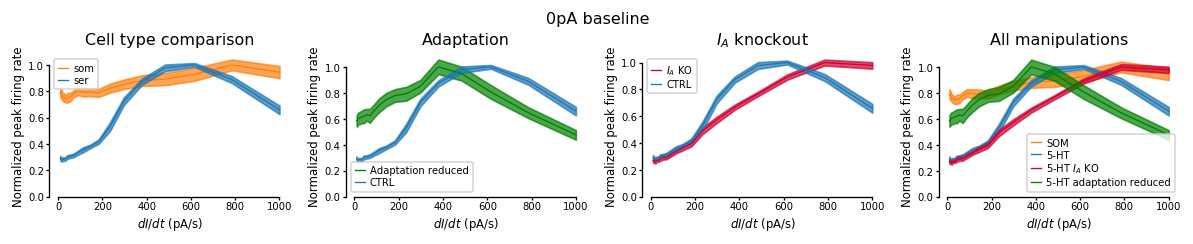

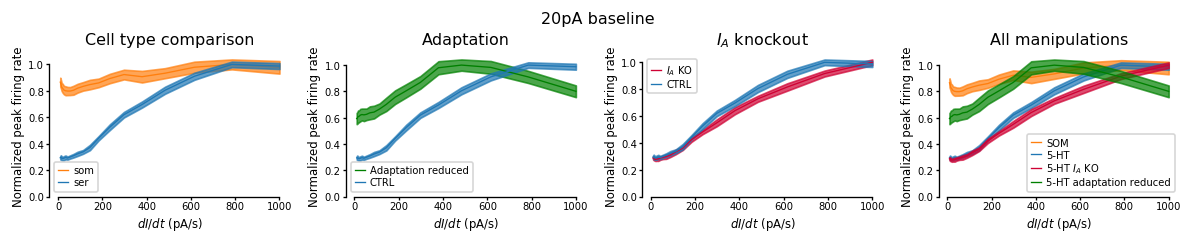

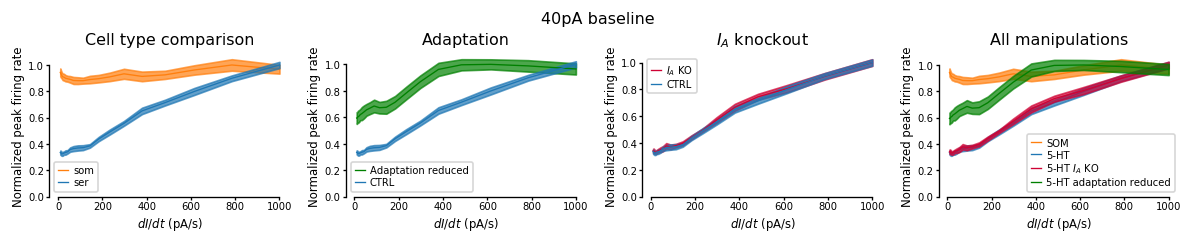

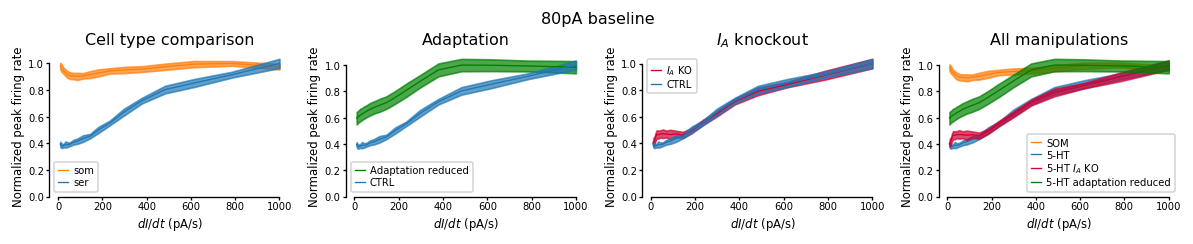

In [14]:
for sweep_ in [2, 3, 4, 5, 6, 8]:
    plt.figure(figsize=(10, 2))
    plt.suptitle('{}pA baseline'.format(int(1e3 * BASELINE_LEVELS[sweep_])))
    
    plt.subplot(141)
    plt.title('Cell type comparison')
    for i, ct in enumerate(['som', 'ser']):
        plot_mean_std(
            max_resp['ctrl'][ct]['mean'][sweep_, :],
            max_resp['ctrl'][ct]['std'][sweep_, :],
            color=colors[ct],
            zorder=i,
            fill_args={'alpha': 0.7},
            line_args={'label': ct}
        )
    patch_axes()

    plt.subplot(142)
    plt.title('Adaptation')
    for cond, (label, color) in {
        'ctrl': ('CTRL', colors['ser']), 
        'adaptation': ('Adaptation reduced', 'g'),
    }.items():
        plot_mean_std(
            max_resp[cond]['ser']['mean'][sweep_, :],
            max_resp[cond]['ser']['std'][sweep_, :],
            color=color,
            zorder=i,
            fill_args={'alpha': 0.7},
            line_args={'label': label}
        )
    patch_axes()
        
    plt.subplot(143)
    plt.title('$I_A$ knockout')
    for cond, (label, color) in {
        'ctrl': ('CTRL', colors['ser']), 
        'ia': ('$I_A$ KO', colors['4AP']),
    }.items():
        plot_mean_std(
            max_resp[cond]['ser']['mean'][sweep_, :],
            max_resp[cond]['ser']['std'][sweep_, :],
            color=color,
            zorder=i,
            fill_args={'alpha': 0.7},
            line_args={'label': label}
        )
    patch_axes()
    
    plt.subplot(144)
    plt.title('All manipulations')
    for i, ((cond, ct), (label, color)) in enumerate({
        ('ctrl', 'ser'): ('5-HT', colors['ser']), 
        ('ctrl', 'som'): ('SOM', colors['som']),
        ('ia', 'ser'): ('5-HT $I_A$ KO', colors['4AP']),
        ('adaptation', 'ser'): ('5-HT adaptation reduced', 'g')
    }.items()):
        plot_mean_std(
            max_resp[cond][ct]['mean'][sweep_, :],
            max_resp[cond][ct]['std'][sweep_, :],
            color=color,
            zorder=i,
            fill_args={'alpha': 0.7},
            line_args={'label': label}
        )
    patch_axes()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    if IMG_PATH is not None:
        savefig(os.path.join(IMG_PATH, 'deriv_lineplots', 'sweep_{}'.format(sweep_)))